<a href="https://colab.research.google.com/github/surekhaofficial08/project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📁 Please upload customer_churn_sample.csv


Saving customer_churn_sample.csv to customer_churn_sample.csv

✅ Dataset loaded:


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MonthlyCharges,TotalCharges,Churn
0,1,Male,0,Yes,No,1,Yes,29.85,29.85,No
1,2,Female,1,No,Yes,34,No,56.95,1889.50,Yes
2,3,Male,0,Yes,No,2,Yes,53.85,108.15,No
3,4,Female,1,No,Yes,45,No,42.30,1840.75,Yes
4,5,Male,0,Yes,No,5,Yes,70.70,151.65,No



🔍 Preprocessed Data Sample:


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,1,29.85,29.85,0
1,0,1,0,1,34,0,56.95,1889.50,1
2,1,0,1,0,2,1,53.85,108.15,0
3,0,1,0,1,45,0,42.30,1840.75,1
4,1,0,1,0,5,1,70.70,151.65,0



✅ Accuracy: 100.00%

🧾 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


📊 Confusion Matrix:


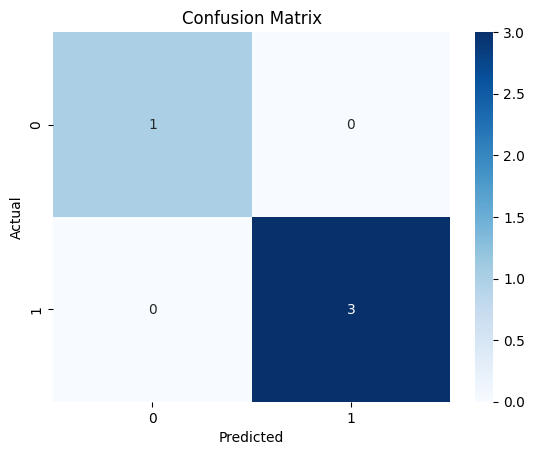

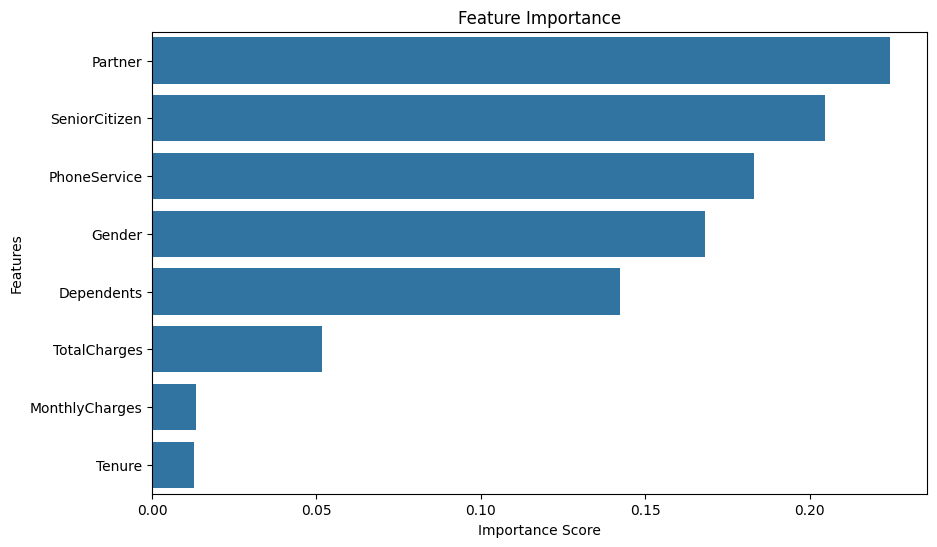

In [1]:
# STEP 1: Install required packages (if needed)
!pip install -q seaborn scikit-learn

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# STEP 3: Upload the CSV file
print("📁 Please upload customer_churn_sample.csv")
uploaded = files.upload()

# STEP 4: Load the dataset
df = pd.read_csv('customer_churn_sample.csv')
print("\n✅ Dataset loaded:")
display(df.head())

# STEP 5: Preprocess the data
df = df.drop('CustomerID', axis=1)

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

print("\n🔍 Preprocessed Data Sample:")
display(df.head())

# STEP 6: Split the data
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 8: Make predictions
y_pred = model.predict(X_test)

# STEP 9: Evaluate the model
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {acc*100:.2f}%")

print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# STEP 10: Feature Importance
importances = model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
